#verify pyEMU null space projection with the freyberg problem

In [1]:
%matplotlib inline
import os
import shutil
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pyemu

instaniate ```pyemu``` object and drop prior info.  Then reorder the jacobian and save as binary.  This is needed because the pest utilities require strict order between the control file and jacobian

In [2]:
mc = pyemu.MonteCarlo(jco="freyberg.jcb",verbose=False)
mc.drop_prior_information()
jco_ord = mc.jco.get(mc.pst.obs_names,mc.pst.par_names)
ord_base = "freyberg_ord"
jco_ord.to_binary(ord_base + ".jco")  
mc.pst.control_data.parsaverun = ' '
mc.pst.write(ord_base+".pst")

Draw some vectors from the prior and write the vectors to par files

In [3]:
# setup the dirs to hold all this stuff
par_dir = "prior_par_draws"
proj_dir = "proj_par_draws"
parfile_base = os.path.join(par_dir,"draw_")
projparfile_base = os.path.join(proj_dir,"draw_")
if os.path.exists(par_dir):
   shutil.rmtree(par_dir)
os.mkdir(par_dir)
if os.path.exists(proj_dir):
   shutil.rmtree(proj_dir)
os.mkdir(proj_dir)
mc = pyemu.MonteCarlo(jco=ord_base+".jco")
# make some draws
mc.draw(10)

#write them to files
mc.parensemble.to_parfiles(parfile_base)

Run pnulpar

In [4]:
exe = os.path.join("exe","pnulpar.exe")
args = [ord_base+".pst","y","1","y","pnulpar_qhalfx.mat",parfile_base,projparfile_base]
in_file = os.path.join("misc","pnulpar.in")
with open(in_file,'w') as f:
    f.write('\n'.join(args)+'\n') 
os.system(exe + ' <'+in_file)


0

In [5]:
pnul_en = pyemu.ParameterEnsemble(mc.pst)
parfiles =[os.path.join(proj_dir,f) for f in os.listdir(proj_dir) if f.endswith(".par")]
pnul_en.read_parfiles(parfiles)

In [6]:
pnul_en.loc[:,"fname"] = pnul_en.index
pnul_en.index = pnul_en.fname.apply(lambda x:str(int(x.split('.')[0].split('_')[-1])))
f = pnul_en.pop("fname")

In [7]:

pnul_en.sort_index(axis=1,inplace=True)
pnul_en.sort_index(axis=0,inplace=True)
pnul_en

parnme,hkr00c00,hkr00c01,hkr00c02,hkr00c03,hkr00c04,hkr00c05,hkr00c06,hkr00c07,hkr00c08,hkr00c09,...,wf2_1,wf2_2,wf3_1,wf3_2,wf4_1,wf4_2,wf5_1,wf5_2,wf6_1,wf6_2
fname,,,,,,,,,,,,,,,,,,,,,
1,6.606622,4.371600,38.909330,5.162489,1.623941,10.731700,3.159241,7.272025,0.925716,1.073010,...,348.0779,519.219,349.5886,631.800,76.48084,62.3247,61.80017,79.4226,349.0672,497.092
10,29.598850,41.619430,13.332600,1.933633,0.594751,1.884334,2.723528,9.142776,29.679450,2.081804,...,342.3415,356.278,346.1207,478.298,72.77239,65.5427,59.41290,101.1670,365.3979,683.019
2,7.642332,15.301380,10.402890,3.303951,25.486640,0.724187,9.595247,59.475120,7.441705,19.100400,...,331.0439,658.376,336.1440,631.800,68.99859,108.3910,58.90646,44.0221,352.8197,332.178
3,22.226930,3.588993,10.889180,9.826062,2.783793,10.657730,0.594751,13.354160,1.541434,2.256421,...,351.6125,550.602,322.7687,496.832,71.24231,99.9703,63.26875,116.6400,346.4380,658.631
4,3.676409,15.088820,8.805965,6.271492,2.047126,16.378890,1.295337,2.055800,1.277490,4.178353,...,385.2854,384.758,352.7393,336.350,68.40291,125.7180,65.14380,115.2300,345.0072,411.978
5,0.594751,2.709164,10.153090,1.695453,20.257820,3.989146,10.138940,10.620360,1.699304,13.566910,...,372.8599,434.924,327.1230,380.098,69.81833,74.4935,62.21544,50.8969,340.4713,460.966
6,42.734020,1.105438,3.506946,2.742130,4.838921,16.095130,7.300602,4.717979,1.422951,11.217560,...,372.0157,565.903,358.7346,500.655,74.82206,58.0758,60.77360,81.7622,347.3353,448.822
7,6.913211,3.794791,4.350593,1.654123,3.056073,4.372459,1.000142,16.170560,59.475120,2.082105,...,355.8908,462.583,345.0832,523.856,66.65559,67.0915,62.63408,49.8222,408.6720,362.401
8,19.686950,7.580321,19.320490,13.781710,3.503330,9.343091,16.041970,5.419411,37.605120,3.533830,...,355.2545,424.164,341.2653,486.149,77.24632,121.6330,65.36038,87.9393,374.4045,497.066


Now for pyemu

In [8]:
print(mc.parensemble.islog)

en = mc.project_parensemble(nsing=1,inplace=False)
print(mc.parensemble.islog)

False
True


In [9]:
en.sort_index(axis=1,inplace=True)
en.sort_index(axis=0,inplace=True)
en

parnme,hkr00c00,hkr00c01,hkr00c02,hkr00c03,hkr00c04,hkr00c05,hkr00c06,hkr00c07,hkr00c08,hkr00c09,...,wf2_1,wf2_2,wf3_1,wf3_2,wf4_1,wf4_2,wf5_1,wf5_2,wf6_1,wf6_2
1,6.606624,4.371600,38.909374,5.162485,1.623944,10.731713,3.159246,7.272027,0.925716,1.073006,...,348.077718,519.218551,349.588646,631.800000,76.480871,62.324673,61.800207,79.422590,349.066954,497.092110
10,29.598884,41.619433,13.332565,1.933631,0.594751,1.884338,2.723530,9.142779,29.679439,2.081801,...,342.341730,356.277580,346.120830,478.297927,72.772375,65.542726,59.412868,101.167317,365.398369,683.019335
2,7.642334,15.301356,10.402858,3.303955,25.486658,0.724187,9.595250,59.475120,7.441701,19.100364,...,331.043512,658.375944,336.143489,631.800000,68.998614,108.390565,58.906438,44.022060,352.819894,332.177790
3,22.226936,3.588991,10.889191,9.826061,2.783794,10.657732,0.594751,13.354166,1.541436,2.256423,...,351.613027,550.602011,322.768589,496.832275,71.242347,99.970320,63.268762,116.640000,346.438444,658.631170
4,3.676408,15.088793,8.805967,6.271493,2.047126,16.378862,1.295340,2.055796,1.277493,4.178350,...,385.285369,384.758182,352.739483,336.350233,68.402878,125.718484,65.143774,115.229686,345.006919,411.978034
5,0.594751,2.709159,10.153133,1.695449,20.257827,3.989145,10.138968,10.620323,1.699305,13.566956,...,372.860006,434.923569,327.122629,380.098426,69.818301,74.493450,62.215420,50.896944,340.471518,460.966333
6,42.734020,1.105438,3.506951,2.742127,4.838920,16.095102,7.300604,4.717975,1.422950,11.217564,...,372.015683,565.903099,358.734660,500.655004,74.822086,58.075783,60.773589,81.762153,347.335077,448.822059
7,6.913213,3.794794,4.350595,1.654127,3.056077,4.372457,1.000140,16.170512,59.475120,2.082109,...,355.891020,462.583278,345.083003,523.855797,66.655635,67.091473,62.634107,49.822235,408.672000,362.401082
8,19.686944,7.580322,19.320468,13.781718,3.503328,9.343087,16.041978,5.419411,37.605153,3.533825,...,355.254625,424.164387,341.264897,486.148881,77.246325,121.633142,65.360353,87.939307,374.404503,497.066485
9,3.242961,2.466611,7.008213,57.562599,12.471450,7.171396,26.674243,2.010248,1.439277,0.594751,...,369.918371,499.703832,338.518594,429.914249,64.621748,81.586493,61.604820,64.666098,361.498717,592.541257


fname
1     0.000022
10    0.000049
2     0.000063
3     0.000026
4     0.000008
5     0.000072
6     0.000013
7     0.000023
8     0.000098
9     0.000043
Name: wf6_2, dtype: float64

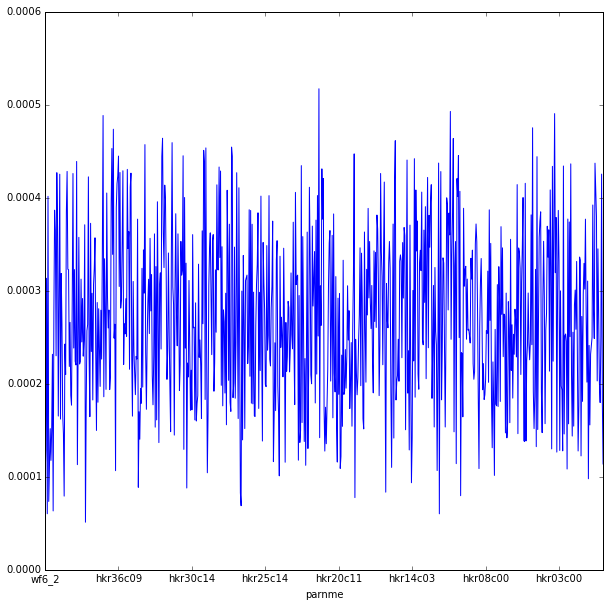

In [11]:
#pnul_en.sort(inplace=True)
#en.sort(inplace=True)
diff = 100.0 * np.abs(pnul_en - en) / en

#diff[diff<1.0] = np.NaN
dmax = diff.max(axis=0)
dmax.sort_index(ascending=False,inplace=True)
dmax.plot(figsize=(10,10))
diff.loc[:,"wf6_2"]

In [13]:
en.loc[:,"wf6_2"]

1     497.092110
10    683.019335
2     332.177790
3     658.631170
4     411.978034
5     460.966333
6     448.822059
7     362.401082
8     497.066485
9     592.541257
Name: wf6_2, dtype: float64

In [14]:
pnul_en.loc[:,"wf6_2"]

fname
1     497.092
10    683.019
2     332.178
3     658.631
4     411.978
5     460.966
6     448.822
7     362.401
8     497.066
9     592.541
Name: wf6_2, dtype: float64